In [10]:
with open('results2.txt') as f:
    content = f.readlines()[0]

content = content.replace('Iteration', '\nIteration')
info = [x for x in content.split('\n') if x]
info

['Iteration 1 - Successes: 76 / 251 (too easy: 12, too hard: 163)',
 'Iteration 2 - Successes: 51 / 147 (too easy: 9, too hard: 87)',
 'Iteration 3 - Successes: 24 / 354 (too easy: 0, too hard: 330)',
 'Iteration 4 - Successes: 3 / 449 (too easy: 0, too hard: 446)',
 'Iteration 5 - Successes: 0 / 432 (too easy: 0, too hard: 432)',
 'Iteration 6 - Successes: 3 / 246 (too easy: 0, too hard: 243)',
 'Iteration 7 - Successes: 34 / 140 (too easy: 7, too hard: 99)',
 'Iteration 8 - Successes: 36 / 159 (too easy: 10, too hard: 113)',
 'Iteration 9 - Successes: 29 / 159 (too easy: 9, too hard: 121)',
 'Iteration 10 - Successes: 45 / 141 (too easy: 13, too hard: 83)',
 'Iteration 11 - Successes: 25 / 282 (too easy: 1, too hard: 256)',
 'Iteration 12 - Successes: 15 / 314 (too easy: 0, too hard: 299)',
 'Iteration 13 - Successes: 7 / 343 (too easy: 6, too hard: 330)',
 'Iteration 14 - Successes: 11 / 347 (too easy: 0, too hard: 336)',
 'Iteration 15 - Successes: 14 / 337 (too easy: 0, too hard: 

In [33]:
import re
import numpy as np
import pandas as pd

regex =  re.compile('Iteration (\d+) - Successes: (\d+) / ([0-9]*) \(too easy: (\d+), too hard: (\d+)\)')

def parseLine(line):
    m = regex.match(line)
    return [int(x) for x in m.groups()]

parsed = [parseLine(line) for line in info]
df = pd.DataFrame(parsed, columns=['Iteration', 'Good', 'Total', 'Easy', 'Hard'])
df.head(5)

,Iteration,Good,Total,Easy,Hard
0,1,76,251,12,163
1,2,51,147,9,87
2,3,24,354,0,330
3,4,3,449,0,446
4,5,0,432,0,432


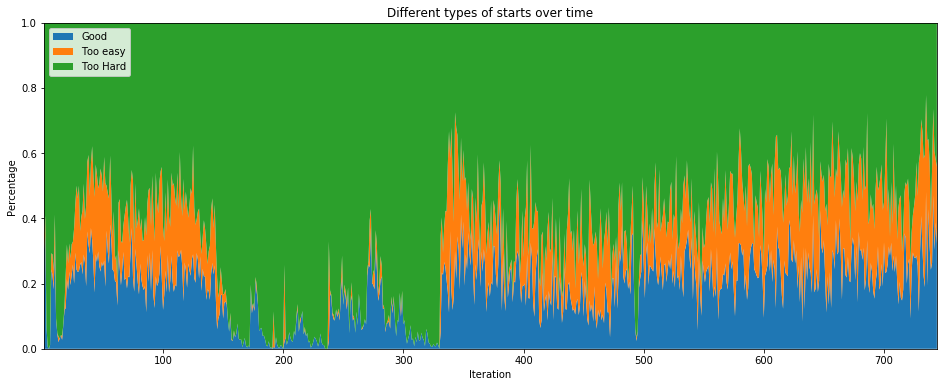

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

df["EasyNorm"] = df.Easy / df.Total
df["GoodNorm"] = df.Good / df.Total
df["HardNorm"] = df.Hard / df.Total

df.head(5)

# Make the plot
plt.figure(figsize=(16, 6))
plt.stackplot(range(1,len(df.Good) + 1),  df.GoodNorm,  df.EasyNorm,  df.HardNorm, labels=['Good','Too easy','Too Hard'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.xlabel("Iteration")
plt.ylabel("Percentage")
plt.title('Different types of starts over time')
plt.savefig("state.eps")
plt.savefig("state.png")
plt.show()
